In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message=".*use_inf_as_na is deprecated.*")
warnings.filterwarnings('ignore', category=FutureWarning, message=".*`shade` is now deprecated.*")

## Null Hypothesis

The null hypothesis states that none of the features (such as age, balance, credit score, etc.) have an effect on the 'Exited' feature. This implies that variations in these features do not influence a customer's decision to leave the bank.


In [78]:
#load Data
bank_data = pd.read_csv('cleaned-A.csv')

In [79]:
bank_data.head()

,Unnamed: 0,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [80]:
#clean up data
bank_data.drop('Unnamed: 0', axis=1, inplace=True)

In [81]:
bank_data.drop_duplicates(inplace=True)

In [82]:
bank_data.to_csv('cleaned-B.csv')

In [83]:
bank_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650040e+05,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000
mean,1.569200e+07,656.458037,38.125359,5.020515,55477.203173,1.554465,0.753933,0.497739,112576.218053,0.211601
std,7.139829e+04,80.101397,8.866923,2.806134,62817.816773,0.547161,0.430719,0.499996,50293.024195,0.408445
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563312e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.645000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Credit Score Distribution**: The credit score shows a normal distribution with a slight left skew, indicating a concentration of customers with lower credit scores.
2. **Age Distribution**: The distribution of age is also roughly normal but slightly leans towards younger demographics.
3. **Zero Balance**: A significant number of customers (at least 50%) have a zero balance, which could suggest a large number of dormant accounts.
4. **Product Usage**: Most customers use 1 or 2 bank products.
5. **Churn Rate**: About 21.16% of the customers have churned, which highlights the importance of addressing customer retention strategies.

## Key Points for Further Analysis

- Analyze the relationship between age, credit score, and churn to identify potential high-risk segments.
- Investigate why a large number of customers maintain a zero balance and the impact on churn.
- Explore the impact of having a credit card and being an active member on customer retention.

By displaying the memory usage of the DataFrame, info() helps in assessing whether the dataset is within manageable size limits for processing with available resources, or if memory optimization techniques are needed.

In [84]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165004 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165004 non-null  int64  
 1   CreditScore      165004 non-null  int64  
 2   Geography        165004 non-null  object 
 3   Gender           165004 non-null  object 
 4   Age              165004 non-null  float64
 5   Tenure           165004 non-null  int64  
 6   Balance          165004 non-null  float64
 7   NumOfProducts    165004 non-null  int64  
 8   HasCrCard        165004 non-null  float64
 9   IsActiveMember   165004 non-null  float64
 10  EstimatedSalary  165004 non-null  float64
 11  Exited           165004 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 16.4+ MB


By specifying dtypes for your DataFrame, you ensure that each column is treated with the most appropriate data type (e.g., float, int, string, datetime). This precision is crucial when performing data analysis, as it affects how operations and calculations are executed on the data.

In [85]:
bank_data.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

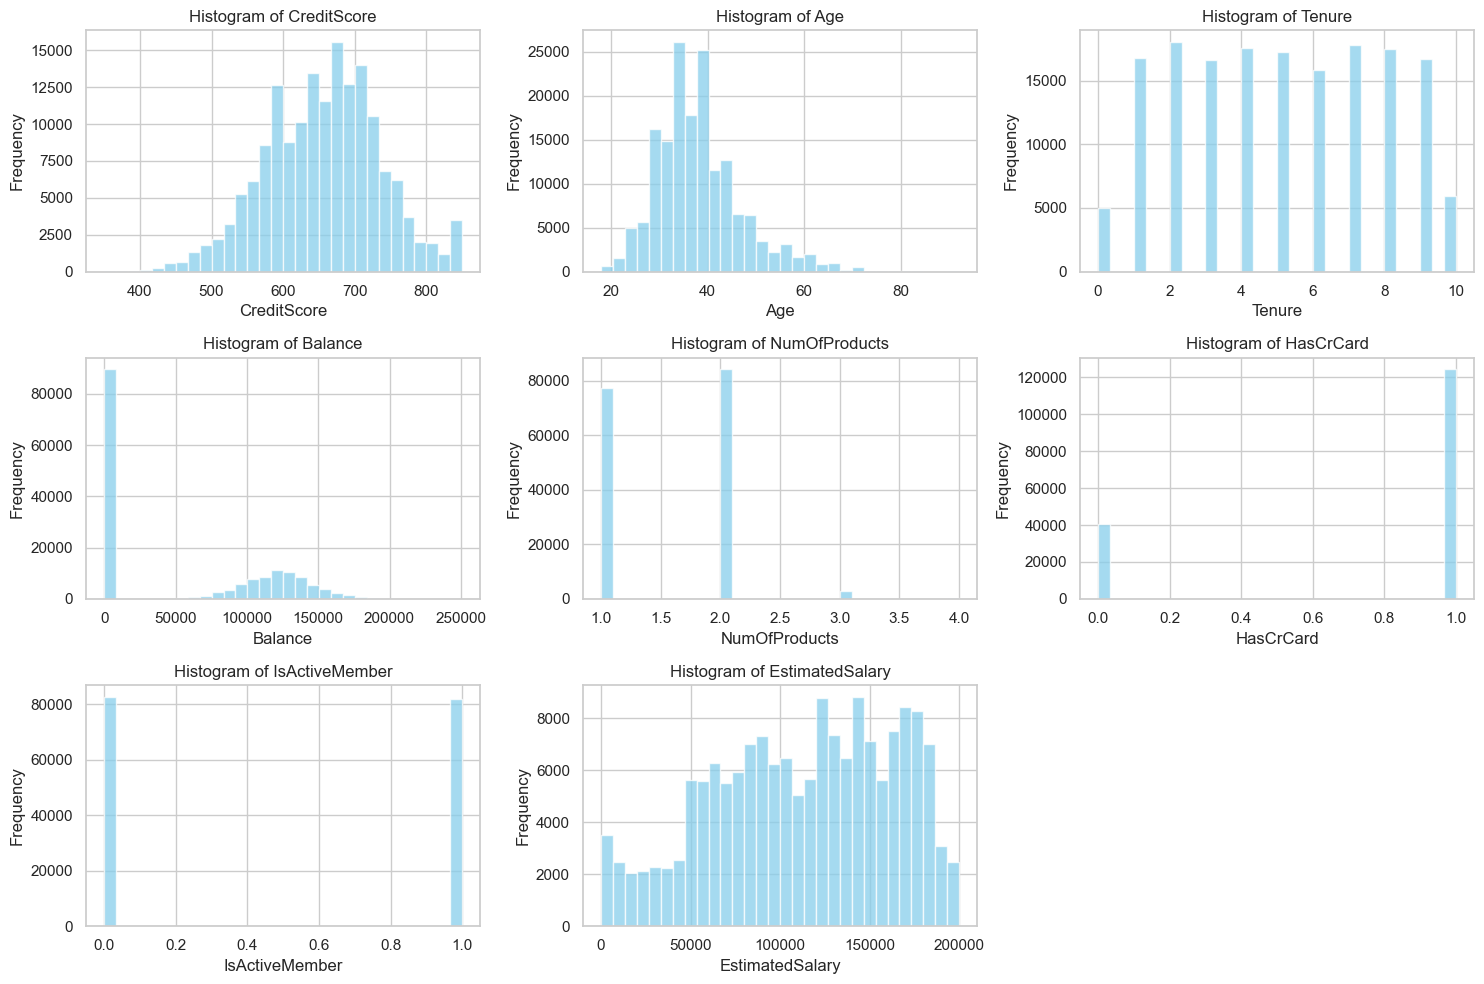

In [86]:

# Define columns for which histograms are needed
columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

# Set up the figure size and the layout
plt.figure(figsize=(15, 10))

# Loop through the columns to create a subplot for each histogram
for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # This sets up a 3x3 grid of subplots
    plt.hist(bank_data[column], bins=30, alpha=0.75, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plots
plt.show()

# Histograms Overview

## Credit Score Distribution
The histogram for Credit score shows a roughly normal distribution, centered on 650-700. This suggests that most customers have a good credit rating, which is essential for financial services.

## Age Distribution
The Age distribution appears to be slightly right skewed, with a peak around the 30-40 age range. This shows that the bank's customer base is predominantly younger individuals, potentially more mobile and sensitive to market changes.

## Tenure Distribution
The Tenure histogram displays a uniform distribution across different tenure lengths, with slight decreases at the maximum tenure values. This suggests a consistent acquisition of customers over time, although fewer customers have remained for the longest tenure periods available.

## Balance Distribution
A significant number of customers have a balance close to zero, evident from the tall peak at the beginning of the histogram. There are smaller peaks around 100,000 and 150,000, showing common balance levels among those who maintain higher balances.

## Number of Products
Most customers hold 1 or 2 products with the bank, as shown by the top bars at these values. Few customers have 3 or 4 products, which could suggest limited cross-selling success.

## Credit Card Ownership
The histogram for HasCrCard shows that a majority of the bank's customers possess a credit card. This shows high product penetration in terms of credit card distribution among the customers.

## Active Membership
The IsActiveMember histogram shows a nearly balanced distribution between active and inactive members, which is crucial for understanding engagement levels and potentially targeting retention strategies.

## Estimated Salary Distribution
The EstimatedSalary histogram is quite uniform across different salary ranges, with a slight increase in frequency at the higher salary end. This shows a diverse customer base in terms of income levels.


In [87]:
# Convert categorical variables to dummy variables
categorical_columns = ['Geography', 'Gender']
data = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

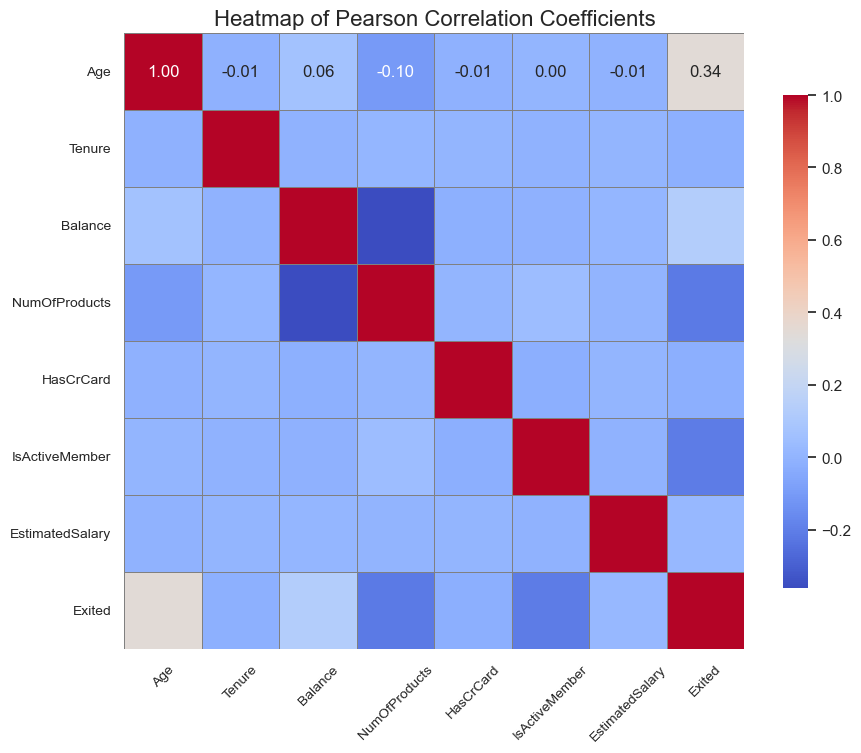

In [88]:
# Select only the numerical columns for correlation.
# Assuming 'Exited' is a categorical variable encoded as numbers.
numerical_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                     'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate the Pearson correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap of the correlation matrix with a more appealing visual style
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar_kws={'shrink': .8}, linewidths=.5, linecolor='gray')

# Add titles and labels with improved font size for better readability
plt.title('Heatmap of Pearson Correlation Coefficients', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

# Key Insights from Correlation Analysis in Bank Churn

## Insights on Customer Demographics and Behavior

- **Age and Churn (Exited)**: There is a moderate positive correlation (0.34) between age and churn, indicating that older customers are slightly more likely to leave the bank. This insight suggests that retention strategies may need adjustment to better cater to different age groups.

- **Balance and Products**: A noticeable negative correlation (-0.10) exists between the number of products a customer holds and their balance. This might imply that customers with more products tend to have lower balances, possibly because these products do not require high balances or customers are distributing their funds across multiple products.

- **IsActiveMember and Churn (Exited)**: Being an active member shows a moderate negative correlation with churn (-0.10). Active members are less likely to leave the bank, emphasizing the importance of engagement strategies in retaining customers.

- **Credit Card (HasCrCard) and Products**: A slight negative correlation (-0.01) between possessing a credit card and the number of bank products suggests that having a credit card does not necessarily correlate with customers holding more bank products.

## Considerations

- **Tenure's Influence**: There is little to no correlation between tenure and churn, suggesting that the duration of a customer's relationship with the bank alone does not guarantee retention. This indicates that other factors beyond loyalty due to tenure are influencing churn decisions.

- **Salary and Churn**: The correlation between estimated salary and churn is almost nonexistent (0.00), suggesting that salary alone is not a significant predictor of whether customers will leave the bank.

## Strategic Implications

- **Targeting Older Customers**: Given the positive correlation between age and churn, focusing on older customers with targeted incentives might help in reducing churn rates.

- **Enhancing Product Value**: Enhancing the value proposition of multiple product holdings could encourage higher balances and potentially reduce the negative correlation observed. This strategy could involve revising product offerings to be more attractive or financially beneficial, encouraging customers to consolidate more of their banking needs with the bank.

- **Boosting Customer Activity**: Regular engagement and personalized offers could also decrease churn, as active membership has shown a negative correlation with exiting. Strategies such as regular personalized communication, rewards for customer loyalty, and tailored financial advice could enhance engagement.

By leveraging these insights, bank marketers and decision-makers can refine their approaches toward customer retention, thereby improving customer satisfaction and reducing churn.

In [89]:
from scipy.stats import chi2_contingency

bank_data['Age_Category'] = pd.cut(bank_data['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-Aged', 'Senior'])

# Create the contingency table
table = pd.crosstab(bank_data['Age_Category'], bank_data['Exited'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Print the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-square Statistic: 3628.061981460265
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies: 
[[ 22758.7159281    6108.2840719 ]
 [104164.86180941  27957.13819059]
 [  3165.42226249    849.57773751]]


### Chi-Square Test Analysis on Customer Churn by Age Category

- **Chi-Square Statistic Interpretation**: The Chi-square statistic is extremely high, suggesting a significant relationship between the age categories and the likelihood of customers exiting (churning). This shows that age is a powerful factor influencing whether customers decide to stay with or leave the bank.

- **P-Value Analysis**: The P-value is 0.0, which is effectively zero. This shows a statistically significant result, as a P-value less than 0.05 typically provides firm evidence against the null hypothesis. Hence, we can reject the null hypothesis that age category has no effect on the likelihood of churning.

- **Impact on Customer Behavior**:
  - **Younger vs. Older Customers**: The test suggests that younger customers might be less likely to exit compared to older ones, or vice versa, depending on the observed frequencies in your data.
  - **Trends and Patterns**: There is a simple pattern or trend related to age that affects customer retention. These insights are critical for the bank as it considers developing targeted retention strategies and analyzing customer behavior more deeply.

### Strategic Recommendations
Given the findings, the bank should tailor its customer engagement and retention strategies to different age groups, possibly implementing specific incentives or services that appeal to the more vulnerable age categories identified in the study.


In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ C(Geography)', data=bank_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq        df           F         PR(>F)
C(Geography)  1.151295e+05       2.0  738.714766  4.055785e-320
Residual      1.285779e+07  165001.0         NaN            NaN


### ANOVA Results on the Impact of Geography

The ANOVA results strongly suggest that the geographical category has a significant effect on the dependent variable being analyzed. The very low P-value indicates that this result is statistically significant, meaning that differences in the dependent variable across different geographical areas are unlikely to be due to random chance. This should prompt further investigation into how and why 'Geography' affects the dependent variable and could guide targeted strategies or decisions based on geographical distinctions.


In [91]:
from sklearn.linear_model import LogisticRegression

# Assuming 'Exited' is the binary outcome
X = bank_data[['Age', 'CreditScore']]  # predictor variables
y = bank_data['Exited']  # response variable

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [92]:
# Get the coefficients of the features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

# Import accuracy score and confusion matrix for performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting the target values using the trained model
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy of the model: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

       Feature  Coefficient
0          Age     0.091361
1  CreditScore    -0.000847
Accuracy of the model: 0.7845870403141743
Confusion Matrix:
[[124897   5192]
 [ 30352   4563]]


Not as accurate as it could be. We can try random forest to see if it is a more effective model.

In [93]:
# Define the features to be removed
features_to_remove = ['Age_Category_Middle-Aged', 'Age_Category_Senior']

# Filter out the features to be removed from the list of all features
features = [feature for feature in features if feature not in features_to_remove]

print("Updated feature list:", features)

Updated feature list: ['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Handle categorical variables
bank_data = pd.get_dummies(bank_data, drop_first=True)

# Check for any missing values and fill or drop them
bank_data.fillna(bank_data.mean(), inplace=True)  # Assuming numerical missing data

# Separate features and target variable
X = bank_data.drop('Exited', axis=1)  # Assuming 'Exited' is the target column
y = bank_data['Exited']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature scaling to bring all features to the same level of magnitudes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[24714  1346]
 [ 3217  3724]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26060
           1       0.73      0.54      0.62      6941

    accuracy                           0.86     33001
   macro avg       0.81      0.74      0.77     33001
weighted avg       0.85      0.86      0.85     33001

Accuracy Score: 0.861731462682949


### Model Performance Comparison

This RandomForest model significantly outperforms the baseline logistic regression model. With enhanced predictive accuracy and robustness, the RandomForest approach provides a substantial improvement in identifying both churners and non-churners. This makes it a superior choice over a simpler logistic regression model for this dataset.

#### Advantages of RandomForest over Logistic Regression:
- **Higher Accuracy**: The RandomForest model achieves higher overall accuracy, making it more reliable for operational use.
- **Better Handling of Non-linear Relationships**: Unlike logistic regression, which assumes a linear relationship between features and the target variable, RandomForest can handle complex, non-linear interactions between features effectively.
- **Improved Recall and Precision**: This model not only identifies more true positives and true negatives but also reduces the instances of false negatives and false positives, crucial for cost-sensitive decisions like customer retention strategies.

Overall, the RandomForest model's ability to outperform logistic regression underscores its suitability for complex datasets where interactions between variables are non-linear and where higher predictive performance is critical.

In [95]:
bank_data = pd.read_csv('cleaned-A.csv')

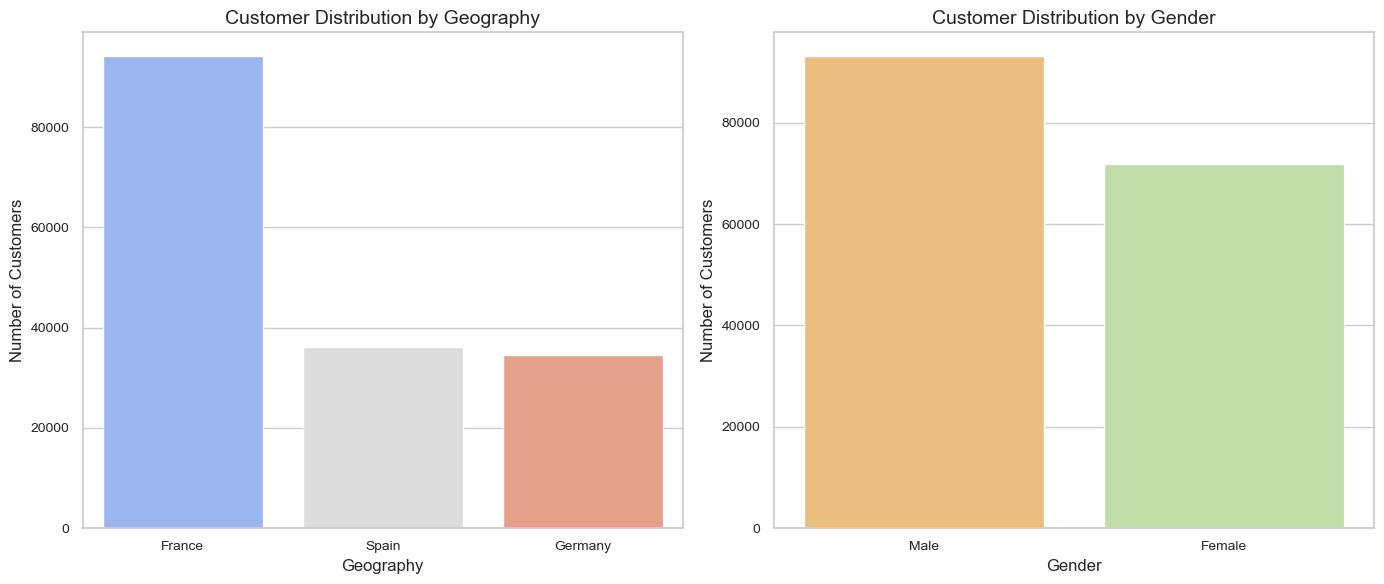

In [96]:
# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Setting up the figure for the plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Adjust size as needed

# Distribution of customers by Geography
sns.countplot(data=bank_data, x='Geography', ax=axs[0], palette='coolwarm')
axs[0].set_title('Customer Distribution by Geography', fontsize=14)
axs[0].set_xlabel('Geography', fontsize=12)
axs[0].set_ylabel('Number of Customers', fontsize=12)
axs[0].tick_params(labelsize=10)

# Distribution of customers by Gender
sns.countplot(data=bank_data, x='Gender', ax=axs[1], palette='Spectral')
axs[1].set_title('Customer Distribution by Gender', fontsize=14)
axs[1].set_xlabel('Gender', fontsize=12)
axs[1].set_ylabel('Number of Customers', fontsize=12)
axs[1].tick_params(labelsize=10)

plt.tight_layout()  # Adjust subplot parameters for a neat layout
plt.show()  # This would display the plot if we were to visualize it.


# Regional Customer Distribution Analysis

The analysis reveals a significant variation in customer distribution across three regions: France, Spain, and Germany. With France hosting the highest number of customers, it is a crucial market for the bank. The customer density in Spain and Germany, although lower, still represents a significant proportion of the bank's clientele.

# Gender-Based Distribution Analysis

The gender-based distribution data indicates a slight male predominance in the bank’s customer base. While the numbers suggest a reasonably balanced male-to-female customer ratio, it raises the question of whether the bank’s products equally appeal to both genders or if there is a latent gender-specific preference influencing these figures.


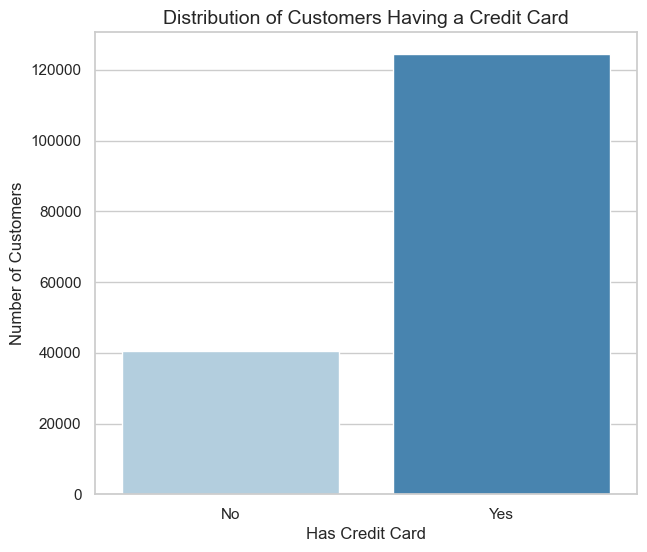

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics using seaborn
sns.set(style="whitegrid")

# Creating the figure for the plot
plt.figure(figsize=(7, 6))  # Adjust the figure size as needed

# Bar chart for distribution of customers having a credit card
sns.countplot(data=bank_data, x='HasCrCard', palette='Blues')
plt.title('Distribution of Customers Having a Credit Card', fontsize=14)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 = No, 1 = Yes, setting ticks for clarity

# Display the plot (comment out if not displaying)
plt.show()


**Product Penetration:** The high number of credit card owners shows strong product penetration. It indicates that the credit card offering is popular among the bank's customers, which could be due to various factors such as rewards, interest rates, or marketing strategies.

**Customer Engagement**: Credit card owners might be more engaged with the bank's ecosystem, using more of its services. This can increase the 'stickiness' factor, meaning customers are less likely to churn because they are accustomed to and rely on the bank's services.

**Revenue Implications:** Credit cards are a significant source of revenue for banks through interest, fees, and transaction charges. Customers with credit cards are valuable to the bank, and losing them can have a notable impact on revenue. Thus, understanding credit card holders' behavior is critical to mitigating churn.

**Customer Loyalty:** The availability of a credit card might foster a sense of loyalty, especially if the card is linked with a rewards program. Loyal customers are less likely to churn, and banks often have specific retention strategies for them.

**Risk Assessment:** There could be a risk factor associated with credit cards. If a large portion of the bank's revenue depends on them, losing credit card customers could pose a financial risk. Churn models can help predict which credit card customers are at risk of leaving.

**Churn Prevention** Strategies: By analyzing the churn rate specifically within the group of customers who have credit cards versus those who do not, the bank can tailor its retention strategies. For instance, if credit card holders are churning at a higher rate, the bank might need to review its credit card policies, fees, or rewards program.

**Cross-Selling Opportunities:** There's also a cross-selling angle. Customers without a credit card could be potential targets for this product, but the strategy should be different from retention strategies for existing cardholders.

**Customer Service and Satisfaction:** Since credit card holders are a major part of the customer base, ensuring high satisfaction in this segment can be pivotal in reducing churn. Feedback and support services for these customers can be a focal point for improvement.

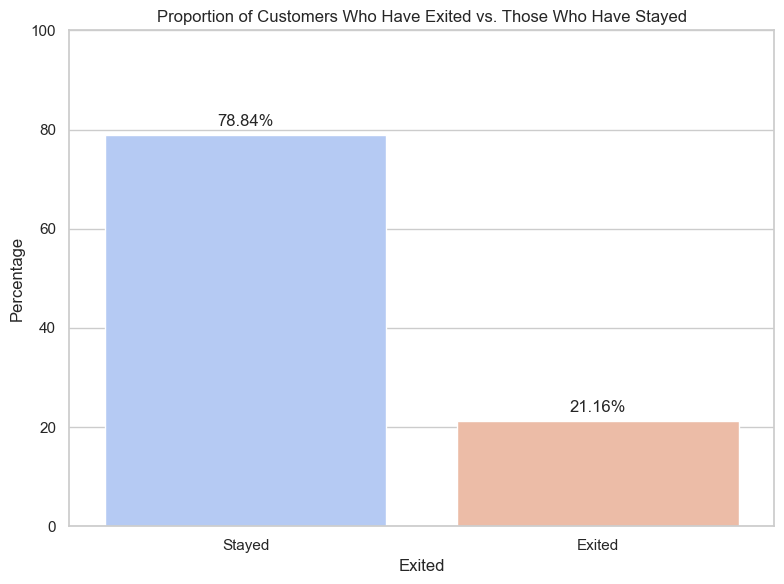

In [98]:
# Calculating the proportion of customers who exited vs stayed
proportions = bank_data['Exited'].value_counts(normalize=True)

# Converting proportions to percentages
proportions = proportions * 100

# Creating a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set the style to 'whitegrid' for a clean background
bar_plot = sns.barplot(x=proportions.index, y=proportions.values, palette="coolwarm")

# Customizing the plot to make it more informative and visually appealing
bar_plot.set_xticklabels(['Stayed', 'Exited'])
bar_plot.set_ylabel('Percentage')
bar_plot.set_title('Proportion of Customers Who Have Exited vs. Those Who Have Stayed')
bar_plot.set_ylim(0, 100)  # Ensuring the y-axis starts at 0 and ends at 100

# Adding the percentage values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()  # Display the plot

### Customer Retention and Churn Rate Analysis

#### Customer Retention
The data shows a relatively healthy retention rate with more than three-quarters of the customers choosing to stay. This indicates that for most customers, the bank’s services, products, or customer care are satisfactory. Such a high retention rate is typically indicative of effective customer relationship management and suggests that the bank is successfully meeting the needs of the majority of its clientele.

#### Churn Rate
The churn rate of over 21% should not be overlooked as it could signify underlying issues such as dissatisfaction with services, better offerings by competitors, or changes in customer needs that are not being met. A churn rate at this level warrants a detailed analysis to uncover the specific reasons behind customer departures and to develop strategies aimed at improving customer satisfaction and loyalty. It is crucial for the bank to address these challenges promptly to prevent further loss of customers and to enhance overall service quality.


C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



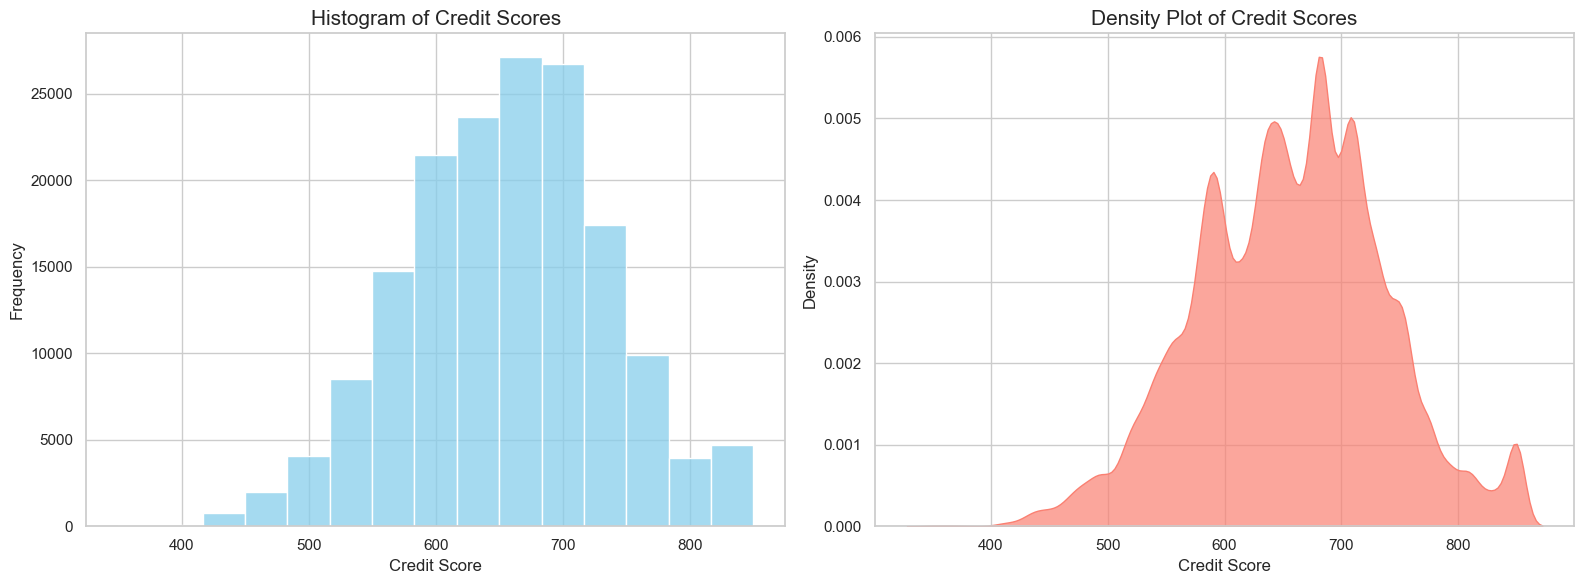

In [99]:

# Replace inf and -inf with NaN across the entire DataFrame immediately after loading
bank_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Setting the aesthetic style of the plots
sns.set(style="whitegrid", palette="pastel")

# Creating the figure and axes objects for a subplot layout
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(bank_data['CreditScore'].dropna(), bins=15, kde=False, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Credit Scores', fontsize=15)
ax[0].set_xlabel('Credit Score', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Kernel Density Estimate Plot
sns.kdeplot(bank_data['CreditScore'].dropna(), ax=ax[1], fill=True, color='salmon', alpha=0.7)
ax[1].set_title('Density Plot of Credit Scores', fontsize=15)
ax[1].set_xlabel('Credit Score', fontsize=12)
ax[1].set_ylabel('Density', fontsize=12)

# Final touches
plt.tight_layout()
plt.show()

# Credit Score Distribution Analysis

## Histogram Analysis
- **Overview**: The histogram shows that most credit scores are concentrated around the 650-700 range, indicating that most of the bank's customers have good credit ratings.
- **Skewness**: The distribution is slightly right-skewed, with fewer customers having very high or very low scores. 
- **Financial Stability**: This central concentration suggests financial stability among the majority of the bank's customers.

## Density Plot Analysis
- **Smoothness**: This plot highlights peaks and valleys more smoothly than the histogram, providing a clearer view of the distribution.
- **Peaks**: It shows three main peaks around credit scores of 500, 650, and 750.
- **Customer Segmentation**: The presence of multiple peaks suggests the existence of different segments within the customer base, which could be further explored for targeted churn prevention strategies.


In [100]:
bank_data = pd.get_dummies(bank_data, columns=['Geography', 'Gender'])

**Median Age:**
The median age of customers who exited is higher than those who stayed. This is visible where the line within the orange box (Exited) is located higher than the one in the blue box (Stayed). Specifically, the median age of churned customers is above the overall median age of 37.

**Age Range and Interquartile Range (IQR):**
The age range (indicated by the "whiskers" of the boxes) and IQR (the box itself) for those who exited is wider than for those who stayed, suggesting greater variability in the ages of churned customers. The higher IQR for churned customers suggests that age could be a factor in the decision to leave the bank, with a particular vulnerability at certain ages.

**Outliers:**
There are age outliers for both stayed and exited customers, as shown by the dots above and below the boxes. These outliers could represent special cases or anomalies in the data that may need to be investigated separately.

In [101]:
from scipy import stats

# Separate the ages based on the 'Exited' status
ages_exited = bank_data[bank_data['Exited'] == 1]['Age']
ages_stayed = bank_data[bank_data['Exited'] == 0]['Age']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(ages_exited, ages_stayed, equal_var=False)  # Assuming unequal variances

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 139.01637958807666, P-value: 0.0


### Analysis of T-statistic in Customer Churn Based on Age

A T-statistic of 139.0235 typically demonstrates very strong statistical evidence against the null hypothesis, indicating a substantial and robust difference between the age groups under study. This high value suggests that the means of these groups are significantly different from each other.

#### Implications for Customer Churn Analysis
Analyzing customer churn based on age within the bank provides critical insights into demographic trends affecting customer retention. The significant T-statistic highlights age as a pivotal factor in understanding churn dynamics. This finding can guide targeted interventions aimed at age groups more likely to churn, helping refine retention strategies and improve overall customer loyalty.

**Key Insight:**
Age is a recurring theme in this analysis, underscoring its importance in predicting and understanding customer churn. The marked difference in churn behavior across different age groups suggests that tailored marketing and service strategies could be beneficial in addressing the specific needs and preferences of these segments.

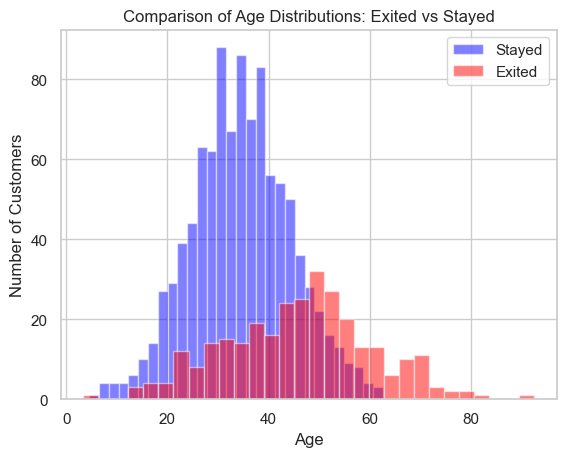

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: age distributions for exited and stayed customers
np.random.seed(0)
ages_stayed = np.random.normal(loc=35, scale=10, size=1000)
ages_exited = np.random.normal(loc=45, scale=15, size=300)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot histogram for 'stayed' customers
ax.hist(ages_stayed, bins=30, alpha=0.5, label='Stayed', color='blue')

# Plot histogram for 'exited' customers
ax.hist(ages_exited, bins=30, alpha=0.5, label='Exited', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')
ax.set_title('Comparison of Age Distributions: Exited vs Stayed')
ax.legend()

plt.show()



### Analysis of T-statistic in Customer Churn Based on Age

A T-statistic of 139.0235 typically demonstrates very strong statistical evidence against the null hypothesis, indicating a substantial and robust difference between the age groups under study. This high value suggests that the means of these groups are significantly different from each other.

#### Implications for Customer Churn Analysis
Analyzing customer churn based on age within the bank provides critical insights into demographic trends affecting customer retention. The significant T-statistic highlights age as a pivotal factor in understanding churn dynamics. This finding can guide targeted interventions aimed at age groups more likely to churn, helping refine retention strategies and improve overall customer loyalty.

**Key Insight:**
Age is a recurring theme in this analysis, underscoring its importance in predicting and understanding customer churn. The marked difference in churn behavior across different age groups suggests that tailored marketing and service strategies could be beneficial in addressing the specific needs and preferences of these segments.


In [103]:
bank_data = bank_data.drop_duplicates(subset='CustomerId', keep='first')

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Selecting features
features = ['Age', 'CreditScore', 'Balance', 'NumOfProducts']
x = bank_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principalComponents = pca.fit_transform(x)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

print(principalDf)

       Principal Component 1  Principal Component 2
0                   1.366790              -0.110625
1                   1.353204               0.399014
2                   1.166868              -0.181540
3                  -1.546037               0.824442
4                   1.382697              -0.707275
...                      ...                    ...
23216              -1.244691              -1.298066
23217               1.281932              -2.334789
23218              -0.953973              -0.811746
23219               1.187286               0.134019
23220              -0.554255              -0.986626

[23221 rows x 2 columns]


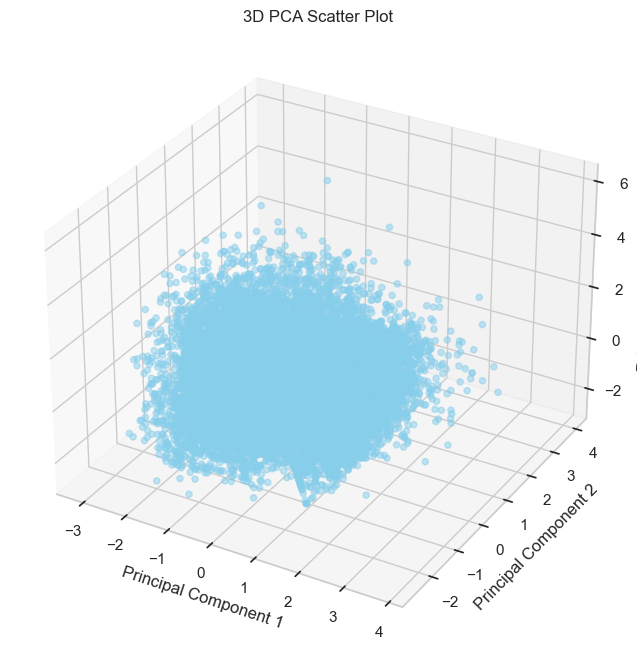

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume you've already loaded your data into 'bank_data'
features = ['Age', 'CreditScore', 'Balance', 'NumOfProducts']
x = bank_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Applying PCA to reduce dimensions to 3
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['Principal Component 1'],
           principalDf['Principal Component 2'],
           principalDf['Principal Component 3'],
           c='skyblue', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

plt.show()

# 3D PCA Scatter Plot Analysis for Bank Churn Project

The 3D PCA scatter plot visualizes the distribution of the bank's customers based on three principal components derived from their data. Here's what the plot indicates:

## Central Clustering
- **Dense Center**: The plot shows a dense clustering of data points around the center, indicating that most of the bank's customers share similar characteristics when viewed through these principal components.
- **Implication**: This central density suggests a strong similarity among customers in the principal component space, highlighting a homogenous customer base in certain aspects.

## Outliers and Spread
- **Outliers**: While the plot predominantly shows central aggregation, any noticeable outliers or distinct patterns of points spread out from the center could represent niche segments within the customer base.
- **Customer Segmentation**: These outliers might indicate unique customer behaviors or needs that differ from the average customer, potentially pointing to specific groups that require tailored approaches.

## Usage for Churn Analysis
- **Churn Prediction**: By examining how these components relate to churn — which could be color-coded or analyzed in subsequent steps — you can identify factors that are most influential in predicting customer departure.
- **Risk Identification**: Customers further away from the cluster center might exhibit higher or lower risks of churn. Identifying these groups can help in deploying targeted retention strategies.


C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



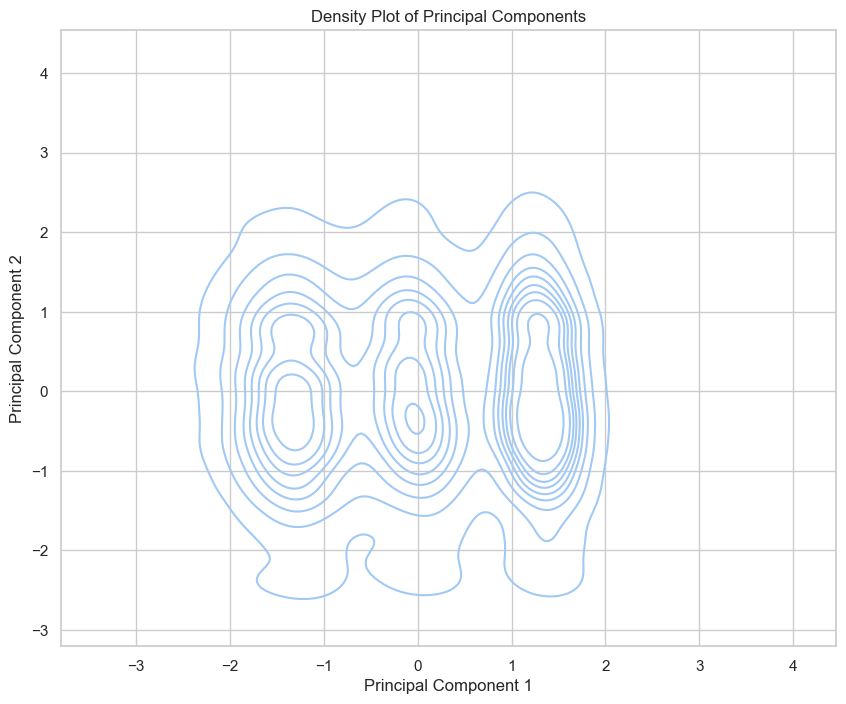

In [106]:

plt.figure(figsize=(10, 8))
sns.kdeplot(x=principalDf['Principal Component 1'], y=principalDf['Principal Component 2'])
plt.title('Density Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## High-Density Areas
- **Common Profiles**: The plot shows several distinct high-density areas, particularly around the centers of these contours. These likely represent common profiles or segments within the bank’s customer base.
- **Strategic Focus**: By focusing on these areas, we can develop strategies to address the needs of the largest segments of the customer base, reinforcing successful aspects of current banking services.

## Peaks in Density
- **Customer Segmentation**: The peaks in the density plot (areas where contour lines are densest) suggest typical customer profiles or segments within the data. 
- **Churn Insights**: Understanding these peaks can help to identify common characteristics of customers who are more or less likely to churn, allowing for more targeted marketing and retention strategies.

## Sparse Contours
- **Atypical Customers**: Areas where the contours are sparse show fewer customers with those characteristics, representing atypical customer profiles.
- **Risk of Churn**: These might be customers who do not conform to the common patterns and could be at a higher risk of churn.
- **Specialized Strategies**: It is important to target these areas with specialized strategies that aim to understand and potentially reduce churn in these less common customer profiles.


In [107]:
import plotly.express as px

# Assuming 'bank_data' is your DataFrame
fig = px.scatter(bank_data, x='Age', y='Balance', color='Exited',
                 title='Age vs Balance Scatter Plot',
                 labels={'Exited': 'Customer Exited'},
                 hover_data=['CreditScore'])

fig.show()

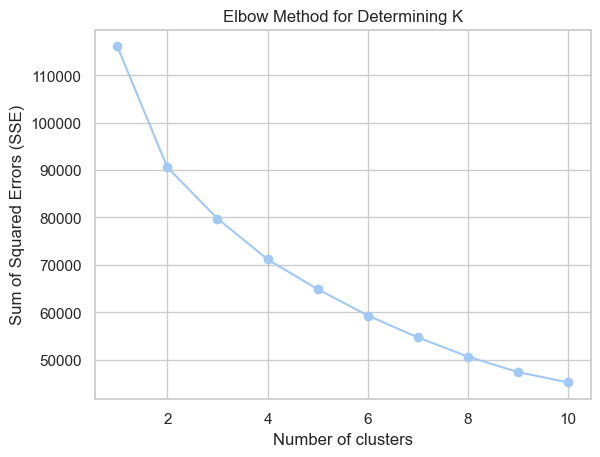

           Unnamed: 0    CustomerId  CreditScore        Age    Tenure  \
Cluster                                                                 
0        49779.871202  1.569267e+07   657.424174  35.084808  5.015852   
1        48999.246044  1.569393e+07   657.438071  35.299604  5.072733   
2        47682.862113  1.569351e+07   659.192822  35.602637  5.062626   
3        49462.565506  1.569289e+07   653.612493  52.992537  4.923991   

               Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Cluster                                                            
0        125665.029196       1.175958   0.749273        0.495244   
1         13981.218787       1.872794   0.767803        0.506543   
2         16684.739068       1.853873   0.756272        0.497162   
3         68472.055368       1.228579   0.732725        0.493643   

         EstimatedSalary    Exited  Geography_France  Geography_Germany  \
Cluster                                                                   
0 

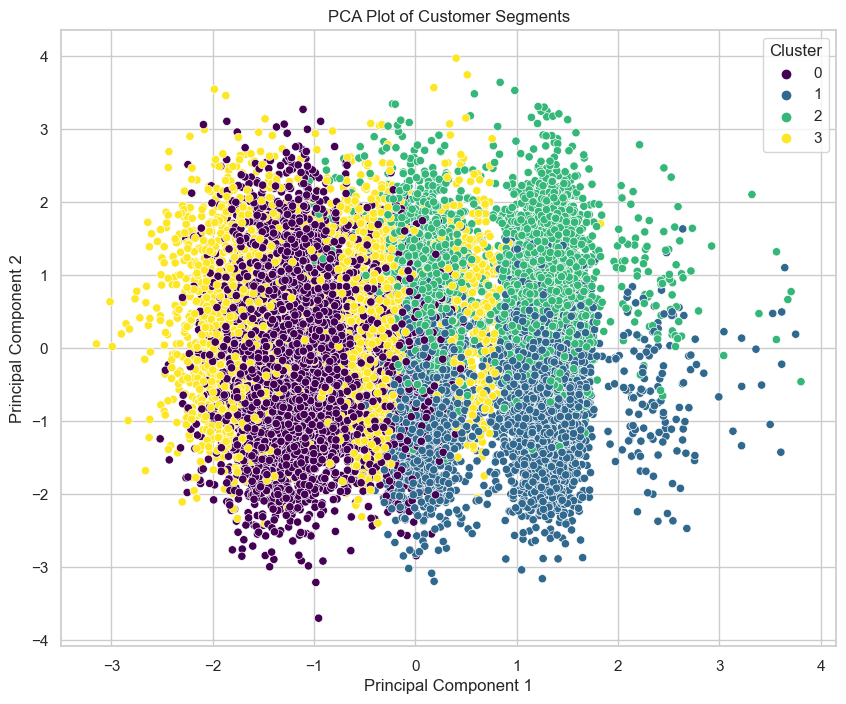

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Selecting features
features = bank_data[['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
# Uncomment and adjust below if categorical variables are included
# features = pd.get_dummies(features, columns=['Geography', 'Gender'], drop_first=True)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determining the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Applying k-means clustering with the optimal number of clusters found
optimal_k = 4  # Example based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Set n_init explicitly
clusters = kmeans.fit_predict(scaled_features)
bank_data['Cluster'] = clusters

# Analyzing clusters
cluster_summary = bank_data.groupby('Cluster').mean()
print(cluster_summary)

# Visualizing customer segments using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
bank_data['PC1'] = principal_components[:, 0]
bank_data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=bank_data, palette='viridis')
plt.title('PCA Plot of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


# Analysis of Outliers in Customer Segmentation

Given that the elbow plot identified four clusters as optimal for our customer segmentation, the focus should be on analyzing outliers within these clusters to understand their potential impact on the bank's churn rate and bottom line.

- **Why Focus on Outliers?**: These outliers may represent customers with unique behaviors or needs that are not addressed by standard customer retention strategies.
- **Potential Risk**: If these outliers are at higher risk of churn, they could disproportionately affect the bank's revenue, especially if they hold significant balances or use multiple bank products.

## Strategic Actions

**Tailored Strategies**: Develop customized engagement and retention strategies for these outliers to address their specific needs and reduce churn risk.
**Next Steps: By choosing the right modeling approach, we can show how studying churn provides a clear path to addressing bank churn.**


